<a href="https://colab.research.google.com/github/frankthairu/Week-9-Modelling-IP/blob/main/Francis_Thairu_Naive_Bayes_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Defining Data Question

##a) Specifying the Question
We are building a model that determines whether or not a message is a spam or not given other features.

##b) Defining the Metric for success.
This project will be considered a success when we develop a classification model that has a high accuracy score of between 70% and 95% 

We will also be calculating the RMSEs but that will not the main determinant for our project.

##c) Understanding the context
The dataset that we will be using is a spam text dataset.



##d) Recording the experimental design.
The following steps will be followed in conducting this study: 
* Define the question, the metric for success, the context, experimental design taken.

* Read and explore the given dataset.
Define the appropriateness of the available data to answer the given question.

* Find and deal with outliers, anomalies, and missing data within the dataset.

* Perform univariate and bivariate analysis and recording our observations.

* Performing prediction, we will use the train set to create train and test data (i.e. splitting further), then perform multiple Naive Bayes such as berrnouli, gaussian, multinomial.

* We will then compute the accuracy (percentage of correct classification)and report the confusion matrix of each classifier.
Repeat step 2 to step 4 twice, each time splitting the datasets differently i.e. 70-30, 60-40, then note the outcomes of your modeling

e) Data Relevance
The data we will be using can be found in the link below


https://archive.ics.uci.edu/ml/datasets/Spambase



# Importing relevant libraries

In [82]:
%matplotlib inline

#importing our necessary libraries
import seaborn as sb
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import math
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
# Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import  accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# Reading our data

In [34]:
#loading the data 
df = pd.read_csv('/content/spambase.data', names=( 'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_%3B', 'char_freq_%28', 'char_freq_%5B', 'char_freq_%21',
       'char_freq_%24', 'char_freq_%23', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total', 'class'))

## Inspecting our data

In [35]:
#we preview our train dataset
df.head(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [46]:
# Checking if there are missing values 
print(df.isnull().sum())

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

We dont have any null values in our dataset

In [37]:
#checking shape of our datasets
print(df.shape)


(4601, 58)


In [38]:
#checking info on our datasets
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

# Data cleaning

#### Checking Outliers

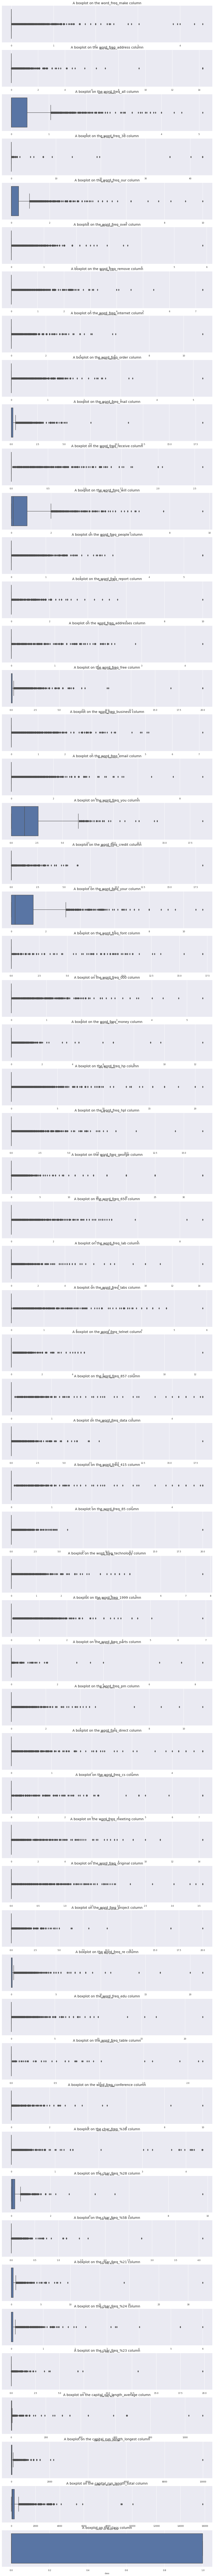

In [40]:
# Checking for Outliers


col_names = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_%3B', 'char_freq_%28', 'char_freq_%5B', 'char_freq_%21',
       'char_freq_%24', 'char_freq_%23', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total', 'class']
fig, ax = plt.subplots(len(col_names), figsize = (16,200))
for i, col_val in enumerate(col_names):

    sns.boxplot(x = df[col_val], ax=ax[i])
    ax[i].set_title('A boxplot on the {} column'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

We  can see that outliers make up most part of our dataset and removing them would rmove most part of our dataset so we leave them.

Oultliers are also important in our modelling

#### Dealing with duplicates

In [ ]:
# We check for duplicates
df = df.drop_duplicates()

In [92]:
#we check for duplicates in our dataset
print(df.duplicated().value_counts())

False    4210
dtype: int64


We can see that we have no duplicates

#### Renaming columns

In [57]:
#Renaming columns
df.rename(columns = {'class':'class_1'}, inplace = True)

We rename the class column in order to assign it later as the main feature.

#### Exporting our new dataset

In [58]:
#We export our cleaned dataset into a csv file
#
df.to_csv('New.csv',index = False, header = True)


In [59]:
#Reading our new dataset
df1=pd.read_csv("New.csv")
df1.head(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class_1
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


# Exploratory Analysis


#### Univariate analysis

In [52]:
#checking the dataset description
df1.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,0.104366,0.112656,0.291473,0.063078,0.325321,0.096656,0.117475,0.108000,0.091860,0.248420,0.056686,0.565204,0.097656,0.061211,0.044803,0.253829,0.149154,0.188755,1.718368,0.084962,0.810040,0.131587,0.100622,0.090969,0.573995,0.279330,0.369838,0.128575,0.098382,0.103779,0.063544,0.044917,0.102333,0.045777,0.107881,0.099368,0.143482,0.014190,0.084057,0.061278,0.041432,0.141542,0.048772,0.085266,0.320124,0.189375,0.005786,0.034746,0.040403,0.144048,0.017376,0.281136,0.076057,0.045798,5.383896,52.139905,291.181948,0.398812
std,0.300005,0.454260,0.515719,1.352487,0.687805,0.276030,0.397284,0.410282,0.282144,0.656638,0.184167,0.882513,0.309309,0.346066,0.242186,0.797534,0.457669,0.541133,1.768760,0.505583,1.149352,1.071258,0.351336,0.431723,1.676539,0.905553,1.775330,0.535429,0.576796,0.439568,0.387267,0.300748,0.569146,0.301812,0.530263,0.386470,0.424508,0.230512,0.447991,0.319520,0.318177,0.793803,0.231871,0.646096,1.045914,0.928308,0.079170,0.298521,0.252533,0.274256,0.105731,0.843321,0.239708,0.435925,33.147358,199.582168,618.654838,0.489712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627500,7.000000,40.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.360000,0.000000,0.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

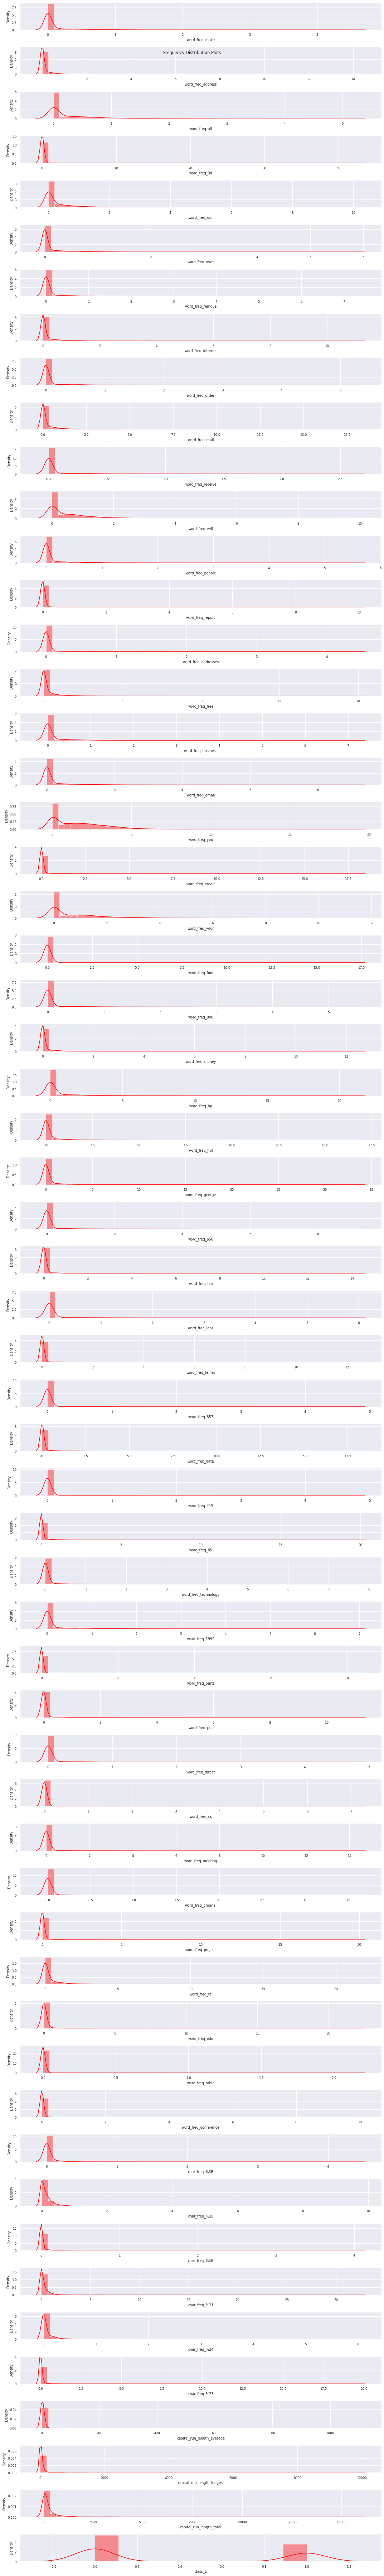

In [63]:
# We get the frequency distribution plots

fig, axes = plt.subplots(len(df1.columns), figsize = (15, 100))
fig.suptitle('Frequency Distribution Plots')

for ax, data, name in zip(axes.flatten(), df1, df1.columns):
  sns.distplot(df1[name], ax = ax, color = 'red')
  
plt.tight_layout()
plt.show()

We can see that in most of our columns, the data is skewed to the right meaning our columns are mainly on the lower boundary of the the whole dataset

In [55]:
# Print unique values for each column
for column in df1.columns:
  print("Column: ",column)
  print("Number of Unique observations: ",df1[column].nunique())
  print("Unique Observations:\n",df1[column].unique())
  print("")
  print("**********************************")

Column:  word_freq_make
Number of Unique observations:  142
Unique Observations:
 [0.   0.21 0.06 0.15 0.05 1.17 0.3  0.18 0.49 0.46 0.73 0.23 0.12 0.66
 0.75 0.47 0.59 1.24 0.5  0.16 0.41 1.   0.36 0.39 0.67 0.42 0.14 0.62
 0.52 0.17 0.44 0.34 0.43 2.12 0.54 0.53 0.51 0.45 0.22 0.07 1.03 0.26
 0.19 0.84 0.08 0.48 0.8  0.58 0.25 0.4  0.1  1.63 0.35 0.64 0.63 0.65
 0.2  0.6  0.76 0.11 1.05 0.29 0.33 0.27 0.31 0.09 0.32 0.57 0.9  0.28
 0.56 2.43 1.18 0.13 2.32 0.68 0.79 1.26 0.89 0.7  0.82 0.87 0.24 0.95
 0.93 0.98 1.01 0.72 0.71 1.23 2.35 0.78 0.38 0.74 1.36 1.47 0.69 1.06
 1.61 1.04 0.37 1.19 1.44 0.61 0.86 0.77 0.99 0.85 4.54 0.96 0.02 1.14
 0.81 1.02 1.11 2.77 0.01 2.   0.04 0.03 1.09 0.97 1.16 2.27 1.07 3.94
 1.75 3.03 0.83 0.55 1.12 2.85 3.84 1.31 1.08 1.49 4.   1.39 4.34 1.42
 1.88 0.88]

**********************************
Column:  word_freq_address
Number of Unique observations:  171
Unique Observations:
 [6.400e-01 2.800e-01 0.000e+00 1.200e-01 6.900e-01 4.200e-01 6.300e-01
 7.0

We can see that most of our columns have many unique values so it will be challenging plotting all of them. 

We however can plot the class column since it only has two unique values and is also the main target of our research.

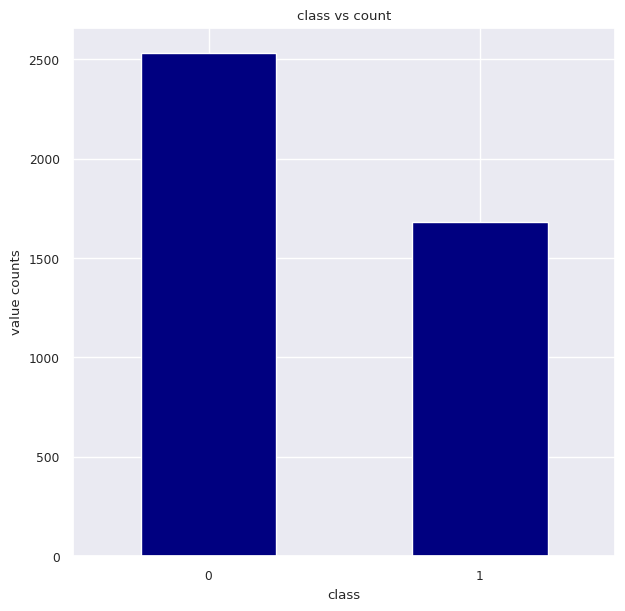


***********


0    2531
1    1679
Name: class_1, dtype: int64

In [64]:
#creating a bar graph of the class
#
sns.set(font_scale=0.8)


plt.figure(figsize = (7,7), dpi = 100)
df1.class_1.value_counts().head()
df1.class_1.value_counts().head().plot(kind= 'bar',color='navy',rot=0)
plt.title('class vs count')
plt.xlabel('class')
plt.ylabel('value counts')

plt.show()

print("")
print("***********")
df1.class_1.value_counts()

We can see that many of the messages were not spam

#### Bivariate analysis

 We will also not be performing much of bivariate analysis because of the nature of our value counts.

In [62]:
#getting the correlation
corr =df1.corr() 
corr

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class_1
word_freq_make,1.000000,0.034012,0.063207,0.005388,0.021740,0.055067,0.011061,-0.004370,0.103842,0.040829,0.063031,0.075911,0.061985,0.032263,0.022454,0.065443,0.081471,0.051571,0.120563,0.020924,0.121458,-0.025574,0.126478,0.205689,-0.075054,-0.063467,-0.048086,-0.050054,-0.041541,-0.054241,-0.038899,-0.031634,-0.042715,-0.026322,-0.046083,-0.057296,-0.058771,-0.008626,-0.011199,-0.035467,-0.005280,-0.026546,-0.025603,-0.022980,-0.037848,-0.034455,-0.000950,-0.018904,-0.027248,-0.019636,-0.034784,0.059184,0.101957,-0.009149,0.044783,0.059128,0.084127,0.129194
word_freq_address,0.034012,1.000000,0.027789,-0.008947,0.036975,0.005526,0.077374,0.013706,0.053426,0.184304,0.060724,0.026247,0.015538,0.012414,0.061826,0.046630,0.022018,0.178853,0.055876,-0.006735,0.117797,0.001214,0.007064,0.061282,-0.053573,-0.044627,-0.011228,-0.033000,-0.026048,-0.029419,-0.015937,0.028852,-0.032575,0.026039,-0.025524,-0.028262,0.003749,-0.012708,-0.016208,0.002326,-0.019350,-0.035908,0.037681,-0.029055,0.020029,-0.026004,-0.012337,-0.020947,0.014735,-0.028348,-0.019436,0.031858,0.044354,0.030669,0.029355,0.053870,0.034590,0.100651
word_freq_all,0.063207,0.027789,1.000000,-0.019901,0.065676,0.066547,0.028581,0.007221,0.077561,0.025138,0.055647,0.065733,0.036431,0.004900,0.104574,0.061937,0.029834,0.110794,0.126502,0.030874,0.147895,-0.039464,0.106694,0.031150,-0.092684,-0.066464,-0.081297,-0.051471,-0.057847,-0.030519,-0.036610,-0.063579,-0.058002,-0.063417,-0.048968,-0.047593,-0.074329,0.031756,-0.017418,-0.046013,-0.030822,-0.007620,-0.052736,-0.056883,-0.056600,-0.060558,0.027384,-0.029465,-0.036778,-0.024545,-0.035805,0.097316,0.072944,-0.004520,0.095671,0.092513,0.051961,0.172350
word_freq_3d,0.005388,-0.008947,-0.019901,1.000000,0.000256,-0.009163,0.014289,0.003801,-0.001040,-0.003845,-0.013191,-0.018577,-0.013153,0.003379,0.005375,0.005798,-0.002827,0.016561,-0.009933,-0.005006,0.004577,0.030589,0.014715,0.025851,-0.015702,-0.014030,-0.009710,-0.010630,-0.007931,-0.010911,-0.007654,-0.006967,-0.008246,-0.006975,-0.005907,-0.006309,-0.007436,-0.002723,-0.004506,-0.007654,-0.006075,-0.008318,-0.009384,-0.006114,-0.013178,-0.009432,-0.003409,-0.001861,-0.000028,-0.011443,-0.007514,-0.003867,0.008273,0.000134,0.005754,0.022105,0.023785,0.056383
word_freq_our,0.021740,0.036975,0.065676,0.000256,1.000000,0.041392,0.135957,0.023411,0.014483,0.027233,0.079164,0.055007,0.020657,0.001586,0.048309,0.079198,0.137868,0.050785,0.083092,0.027838,0.142992,-0.022715,0.062136,0.000321,-0.076783,-0.079807,-0.062482,-0.064151,0.039627,-0.053613,-0.042054,-0.024256,-0.034749,-0.024555,-0.051058,-0.052210,-0.077682,0.133057,-0.045512,-0.017580,-0.052325,0.107706,-0.054583,0.002771,-0.049497,-0.083315,-0.028146,-0.035040,-0.035049,-0.054580,-0.027988,0.019203,0.040696,0.002144,0.050832,0.042985,-0.010498,0.230074
word_freq_over,0.055067,0.005526,0.066547,-0.009163,0.041392,1.000000,0.046868,0.079704,0.097037,0.010099,0.056592,0.001582,0.067278,0.007932,0.140009,0.016681,0.057684,0.059196,0.083312,0.057502,0.105693,0.006869,0.181754,0.059429,-0.086682,

# Modelling 







---



## Gaussian Naive Bayes




---



### Using Gaussian Naive Bayes with 70-30 split

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

#Splitting our dataset
X = df1.iloc[ :, :-1].values
y = df1['class_1'].values

# standardizing the data


scaler = StandardScaler()

scaler.fit_transform(X)


# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


# Training the model

clf = GaussianNB()  
model = clf.fit(X_train, y_train)


# predicting using the model built

y_pred = clf.predict(X_test)

# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print(comparison_frame.describe())
 
print("")
print("_________________________")
#finding the rmses and accuracy of our test
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print("")
print("_________________________")
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))

           Actual   Predicted
count  842.000000  842.000000
mean     0.412114    0.560570
std      0.492508    0.496613
min      0.000000    0.000000
25%      0.000000    0.000000
50%      0.000000    1.000000
75%      1.000000    1.000000
max      1.000000    1.000000

_________________________
Mean Absolute Error: 0.17933491686460806
Mean Squared Error: 0.17933491686460806
Root Mean Squared Error: 0.4234795353551433
The accuracy of the model is  0.8206650831353919

_________________________

 Confusion matrix
[[357 138]
 [ 13 334]]


We get an accuracy of 82% which is good

### Using Gaussian Naive Bayes with 70-30 split

In [78]:
#Splitting our dataset
X = df1.iloc[ :, :-1].values
y = df1['class_1'].values

# standardizing the data


scaler = StandardScaler()

scaler.fit_transform(X)


# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)


# Training the model

clf = GaussianNB()  
model = clf.fit(X_train, y_train)


# predicting using the model built

y_pred = clf.predict(X_test)

# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print(comparison_frame.describe())
 
print("")
print("_________________________")
#finding the rmses and accuracy of our test
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print("")
print("_________________________")
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))

            Actual    Predicted
count  1263.000000  1263.000000
mean      0.416469     0.560570
std       0.493168     0.496514
min       0.000000     0.000000
25%       0.000000     0.000000
50%       0.000000     1.000000
75%       1.000000     1.000000
max       1.000000     1.000000

_________________________
Mean Absolute Error: 0.166270783847981
Mean Squared Error: 0.166270783847981
Root Mean Squared Error: 0.40776314675063635
The accuracy of the model is  0.833729216152019

_________________________

 Confusion matrix
[[541 196]
 [ 14 512]]


We see that we have an accuracy of 83.3% which is pretty good.

### Using Gaussian Naive Bayes with 60-40 split

In [80]:
#Splitting our dataset
X = df1.iloc[ :, :-1].values
y = df1['class_1'].values

# standardizing the data


scaler = StandardScaler()

scaler.fit_transform(X)


# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state=0)


# Training the model

clf = GaussianNB()  
model = clf.fit(X_train, y_train)


# predicting using the model built

y_pred = clf.predict(X_test)

# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print(comparison_frame.describe())
 
print("")
print("_________________________")
#finding the rmses and accuracy of our test
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print("")
print("_________________________")
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))

            Actual    Predicted
count  1684.000000  1684.000000
mean      0.409739     0.549287
std       0.491932     0.497713
min       0.000000     0.000000
25%       0.000000     0.000000
50%       0.000000     1.000000
75%       1.000000     1.000000
max       1.000000     1.000000

_________________________
Mean Absolute Error: 0.1680522565320665
Mean Squared Error: 0.1680522565320665
Root Mean Squared Error: 0.4099417721238792
The accuracy of the model is  0.8319477434679335

_________________________

 Confusion matrix
[[735 259]
 [ 24 666]]


We get an accuracy of 83.1% which is good.

# Challenging the solutions.



---






## Using  multinomial naive bayes


---



### Multinomial Naive Bayes using 80-20 split

In [89]:
#Splitting our dataset
X = df1.iloc[ :, :-1].values
y = df1['class_1'].values

# standardizing the data


scaler = StandardScaler()

scaler.fit_transform(X)


# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


# Training the model

clf = MultinomialNB()  
model = clf.fit(X_train, y_train)


# predicting using the model built

y_pred = clf.predict(X_test)

# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print(comparison_frame.describe())
 
print("")
print("_________________________")
#finding the rmses and accuracy of our test
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print("")
print("_________________________")
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))

           Actual   Predicted
count  842.000000  842.000000
mean     0.412114    0.371734
std      0.492508    0.483555
min      0.000000    0.000000
25%      0.000000    0.000000
50%      0.000000    0.000000
75%      1.000000    1.000000
max      1.000000    1.000000

_________________________
Mean Absolute Error: 0.23040380047505937
Mean Squared Error: 0.23040380047505937
Root Mean Squared Error: 0.48000395881186164
The accuracy of the model is  0.7695961995249406

_________________________

 Confusion matrix
[[415  80]
 [114 233]]


We can see that using multinomial Naive Bayes, using 80-20 split gives a good accuracy of 76.95%

### Multinomial Naive Bayes using 70-30 split

In [90]:
#Splitting our dataset
X = df1.iloc[ :, :-1].values
y = df1['class_1'].values

# standardizing the data


scaler = StandardScaler()

scaler.fit_transform(X)


# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)


# Training the model

clf = MultinomialNB()  
model = clf.fit(X_train, y_train)


# predicting using the model built

y_pred = clf.predict(X_test)

# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print(comparison_frame.describe())
 
print("")
print("_________________________")
#finding the rmses and accuracy of our test
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print("")
print("_________________________")
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))

            Actual    Predicted
count  1263.000000  1263.000000
mean      0.416469     0.377672
std       0.493168     0.484997
min       0.000000     0.000000
25%       0.000000     0.000000
50%       0.000000     0.000000
75%       1.000000     1.000000
max       1.000000     1.000000

_________________________
Mean Absolute Error: 0.21773555027711797
Mean Squared Error: 0.21773555027711797
Root Mean Squared Error: 0.46662142072253604
The accuracy of the model is  0.782264449722882

_________________________

 Confusion matrix
[[624 113]
 [162 364]]


We can see that using multinomial Naive Bayes, using 70-30 split gives a good accuracy of 78.2%

### Multinomial Naive Bayes using 60-40 split

In [91]:
#Splitting our dataset
X = df1.iloc[ :, :-1].values
y = df1['class_1'].values

# standardizing the data


scaler = StandardScaler()

scaler.fit_transform(X)


# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state=0)


# Training the model

clf = MultinomialNB()  
model = clf.fit(X_train, y_train)


# predicting using the model built

y_pred = clf.predict(X_test)

# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print(comparison_frame.describe())
 
print("")
print("_________________________")
#finding the rmses and accuracy of our test
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print("")
print("_________________________")
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))

            Actual    Predicted
count  1684.000000  1684.000000
mean      0.409739     0.388361
std       0.491932     0.487522
min       0.000000     0.000000
25%       0.000000     0.000000
50%       0.000000     0.000000
75%       1.000000     1.000000
max       1.000000     1.000000

_________________________
Mean Absolute Error: 0.20665083135391923
Mean Squared Error: 0.20665083135391923
Root Mean Squared Error: 0.4545886397105841
The accuracy of the model is  0.7933491686460807

_________________________

 Confusion matrix
[[838 156]
 [192 498]]


We can see that using multinomial Naive Bayes, using 60-40 split gives a good accuracy of 79.3%



---





## Using Bernoulli Naive Bayes


---






### Bernoulli Bayes using 80-20 split




In [86]:
#Splitting our dataset
X = df1.iloc[ :, :-1].values
y = df1['class_1'].values

# standardizing the data


scaler = StandardScaler()

scaler.fit_transform(X)


# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


# Training the model

clf = BernoulliNB()  
model = clf.fit(X_train, y_train)


# predicting using the model built

y_pred = clf.predict(X_test)

# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print(comparison_frame.describe())
 
print("")
print("_________________________")
#finding the rmses and accuracy of our test
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print("")
print("_________________________")
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))

           Actual   Predicted
count  842.000000  842.000000
mean     0.412114    0.393112
std      0.492508    0.488732
min      0.000000    0.000000
25%      0.000000    0.000000
50%      0.000000    0.000000
75%      1.000000    1.000000
max      1.000000    1.000000

_________________________
Mean Absolute Error: 0.10926365795724466
Mean Squared Error: 0.10926365795724466
Root Mean Squared Error: 0.33055053767501974
The accuracy of the model is  0.8907363420427553

_________________________

 Confusion matrix
[[457  38]
 [ 54 293]]


We can see that bernoulli NB, using the 80-20 split gives us the a good accuracy score of 89.07%

### Bernoulli Bayes using 70-30 split

In [87]:
#Splitting our dataset
X = df1.iloc[ :, :-1].values
y = df1['class_1'].values

# standardizing the data


scaler = StandardScaler()

scaler.fit_transform(X)


# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)


# Training the model

clf = BernoulliNB()  
model = clf.fit(X_train, y_train)


# predicting using the model built

y_pred = clf.predict(X_test)

# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print(comparison_frame.describe())
 
print("")
print("_________________________")
#finding the rmses and accuracy of our test
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print("")
print("_________________________")
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))

            Actual    Predicted
count  1263.000000  1263.000000
mean      0.416469     0.397466
std       0.493168     0.489568
min       0.000000     0.000000
25%       0.000000     0.000000
50%       0.000000     0.000000
75%       1.000000     1.000000
max       1.000000     1.000000

_________________________
Mean Absolute Error: 0.10134600158353127
Mean Squared Error: 0.10134600158353127
Root Mean Squared Error: 0.3183488677277356
The accuracy of the model is  0.8986539984164688

_________________________

 Confusion matrix
[[685  52]
 [ 76 450]]


We can see that bernoulli NB, using the 70-30 split gives us the a good accuracy score of 89.86%

###Bernoulli Bayes using 60-40 split

In [88]:
#Splitting our dataset
X = df1.iloc[ :, :-1].values
y = df1['class_1'].values

# standardizing the data


scaler = StandardScaler()

scaler.fit_transform(X)


# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state=0)


# Training the model

clf = BernoulliNB()  
model = clf.fit(X_train, y_train)


# predicting using the model built

y_pred = clf.predict(X_test)

# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print(comparison_frame.describe())
 
print("")
print("_________________________")
#finding the rmses and accuracy of our test
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print("")
print("_________________________")
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))

            Actual    Predicted
count  1684.000000  1684.000000
mean      0.409739     0.391330
std       0.491932     0.488193
min       0.000000     0.000000
25%       0.000000     0.000000
50%       0.000000     0.000000
75%       1.000000     1.000000
max       1.000000     1.000000

_________________________
Mean Absolute Error: 0.09798099762470308
Mean Squared Error: 0.09798099762470308
Root Mean Squared Error: 0.31301916494793586
The accuracy of the model is  0.9020190023752969

_________________________

 Confusion matrix
[[927  67]
 [ 98 592]]


We can see that bernoulli NB, using the 60-40 split gives us the highest accuracy score of 90.2%

# Conclusion and Recommendations

After creating and testing our accuracy scores, we came to to the following conclusions;

* Using Gaussian Naive Bayes, one should go with the 70-30 split since it gives the highest accuracy of the three.

* Using Multinormial Naive Bayes, one should go with the 40-60 split since it gives the highest accuracy of the three.

* Using Bernouli Naive Bayes, one should go with the 40-60 split since it gives the highest accuracy of the three.


In general, we recommend using the Bernouli Naive Bayes with 40-60% since it gives the highest of all the Naive Bayes classification.
